In [2]:
import pandas as pd
data = {'Country': ['B','C','D','E','F','G','H'],
'Output, Q': [80, 150, 135, 165, 95, 130, 110],
'Labour, L': [60, 100, 100, 120, 70, 90, 80],
'Capital, K': [50, 100, 80, 100, 60, 80, 70],}
National = pd.DataFrame(data , columns = ['Country','Output, Q','Labour, L','Capital, K'])
print(National)

  Country  Output, Q  Labour, L  Capital, K
0       B         80         60          50
1       C        150        100         100
2       D        135        100          80
3       E        165        120         100
4       F         95         70          60
5       G        130         90          80
6       H        110         80          70


In [25]:
print('Mean of Output, Q is', National['Output, Q'].mean())
print('Mean of Labour, L is', National['Labour, L'].mean())
print('Mean of Capital, K is', National['Capital, K'].mean())

print('Variance of Output, Q is', National['Output, Q'].var())
print('Variance of Labour, L is', National['Labour, L'].var())
print('Variance of Capital, K is', National['Capital, K'].var())

print('Standard Deviation of Output, Q is', National['Output, Q'].std())
print('Standard Deviation of Labour, L is', National['Labour, L'].std())
print('Standard Deviation of Capital, K is', National['Capital, K'].std())

print('Median of Output, Q is', National['Output, Q'].median())
print('Median of Labour, L is', National['Labour, L'].median())
print('Median of Capital, K is', National['Capital, K'].median())

Mean of Output, Q is 123.57142857142857
Mean of Labour, L is 88.57142857142857
Mean of Capital, K is 77.14285714285714
Variance of Output, Q is 914.2857142857143
Variance of Labour, L is 414.2857142857143
Variance of Capital, K is 357.14285714285717
Standard Deviation of Output, Q is 30.237157840738178
Standard Deviation of Labour, L is 20.354009783964297
Standard Deviation of Capital, K is 18.89822365046136
Median of Output, Q is 130.0
Median of Labour, L is 90.0
Median of Capital, K is 80.0
123.57142857142857


Text(0.5, 0, 'Output, Q')

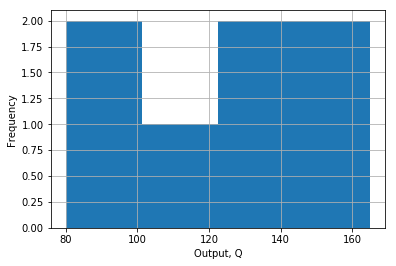

In [3]:
import matplotlib.pyplot as plt
National['Output, Q'].hist(histtype = 'stepfilled', bins = 'auto')
plt.ylabel('Frequency')
plt.xlabel('Output, Q')

Text(0.5, 0, 'Labour, L')

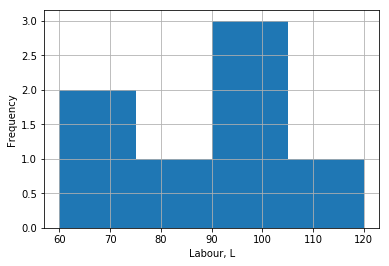

In [35]:
National['Labour, L'].hist(histtype = 'stepfilled', bins = 'auto')
plt.ylabel('Frequency')
plt.xlabel('Labour, L')

In [48]:
import numpy as np
LogQ = National['Output, Q'].apply(np.log)
LogL = National['Labour, L'].apply(np.log)
LogK = National['Capital, K'].apply(np.log)
print(LogQ)
print(LogL)
print(LogK)

0    4.382027
1    5.010635
2    4.905275
3    5.105945
4    4.553877
5    4.867534
6    4.700480
Name: Output, Q, dtype: float64
0    4.094345
1    4.605170
2    4.605170
3    4.787492
4    4.248495
5    4.499810
6    4.382027
Name: Labour, L, dtype: float64
0    3.912023
1    4.605170
2    4.382027
3    4.605170
4    4.094345
5    4.382027
6    4.248495
Name: Capital, K, dtype: float64


In [11]:
import statsmodels.api as sm
y_ml = National["Output, Q"]
x_ml = National[["Labour, L", "Capital, K"]]
x_ml = sm.add_constant(x_pg)
model = sm.OLS(y_ml, x_ml).fit()
predictions = model.predict(x_pg)
model.summary()

C:\Users\Vee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Vee\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Output, Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 15 May 2019   Prob (F-statistic):           5.39e-06
Time:                        19:05:35   Log-Likelihood:                -12.027
No. Observations:                   7   AIC:                             30.05
Df Residuals:                       4   BIC:                             29.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7944      3.241     -1.788      0.148     -14.792       3.203
Labour, L      0.7687      0.106      7.277      0.002       0.475       1.062
Capital, K     0.7944      0.114      6.983      0.002       0.479       1.110
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.804
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.806
Skew:                           1.475   Prob(JB):                        0.246
Kurtosis:                       3.955   Cond. No.                         577.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

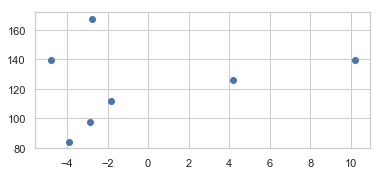

In [19]:
from matplotlib import pyplot as plt
pred_val = model.fittedvalues.copy()
true_val = National['Output, Q'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)